# **PROBLEM STATEMENT**
- Loan defaults are a growing challenge for financial institutions, leading to significant losses and inefficiencies. Traditional loan approval processes often fail to accurately assess borrower risks, contributing to high default rates. There is a need for an advanced predictive model that can leverage borrower data to improve decision-making and minimize financial risks

# **OBJECTIVE**

- The objective of this project is to develop a machine learning model that predicts loan approvals based on borrower attributes such as income, credit history, and employment experience. This model aims to assist financial institutions in reducing default risks, improving decision-making efficiency, and ensuring fair lending practices.

**Difference btw PS and Objective.**


The problem statement defines the why (the problem or challenge), while the objective defines the what (the solution or outcome).

**Problem Statement with Objectives**

Loan defaults pose a significant challenge for financial institutions, leading to financial losses and inefficiencies in the approval process. This project aims to address these challenges by leveraging machine learning techniques to predict loan approvals, thereby reducing risks and improving decision-making

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding Data

In [ ]:
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

 # Data Cleaning


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Descriptive Statistics

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# Data Visualisation

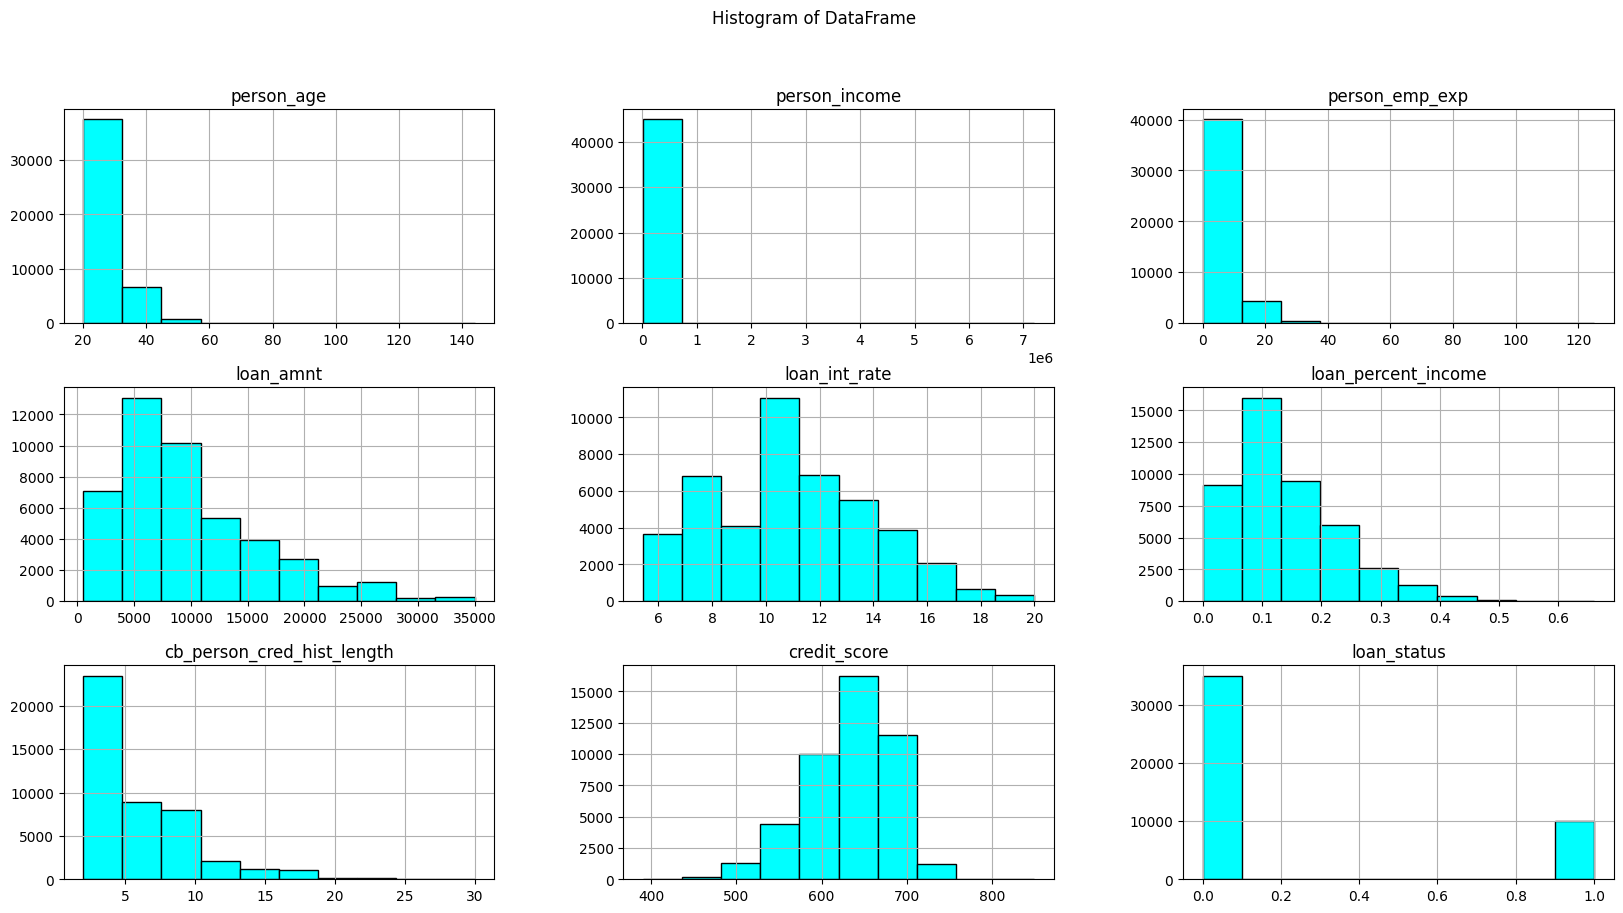

In [ ]:
df.hist(color='cyan',bins=10,edgecolor='k',figsize=(20,10))
plt.suptitle('Histogram of DataFrame')
plt.show()

# Data Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [ ]:
df['person_gender'].value_counts()

,count
person_gender,
male,24841
female,20159


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [ ]:
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file']=le.fit_transform(df['previous_loan_defaults_on_file'])

In [ ]:
df['person_education'].replace(['High School','Associate','Bachelor','Master','Doctorate'],[0,1,2,3,4],inplace=True)

<ipython-input-94-ca9b1d6abfbb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_education'].replace(['High School','Associate','Bachelor','Master','Doctorate'],[0,1,2,3,4],inplace=True)
<ipython-input-94-ca9b1d6abfbb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_education'

In [ ]:
df['person_gender'].replace(['female','male'],[0,1],inplace=True)

<ipython-input-95-4a6bf5694d64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_gender'].replace(['female','male'],[0,1],inplace=True)
<ipython-input-95-4a6bf5694d64>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_gender'].replace(['female','male'],[0,1],inplace=True)


In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,1,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,1,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


# Imbalaced data to Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

X=df.drop('loan_status',axis=1)
y=df['loan_status']

smote=SMOTE(random_state=42)

X_resampled,y_resampled=smote.fit_resample(X,y)

df=pd.concat([X_resampled,y_resampled],axis=1)

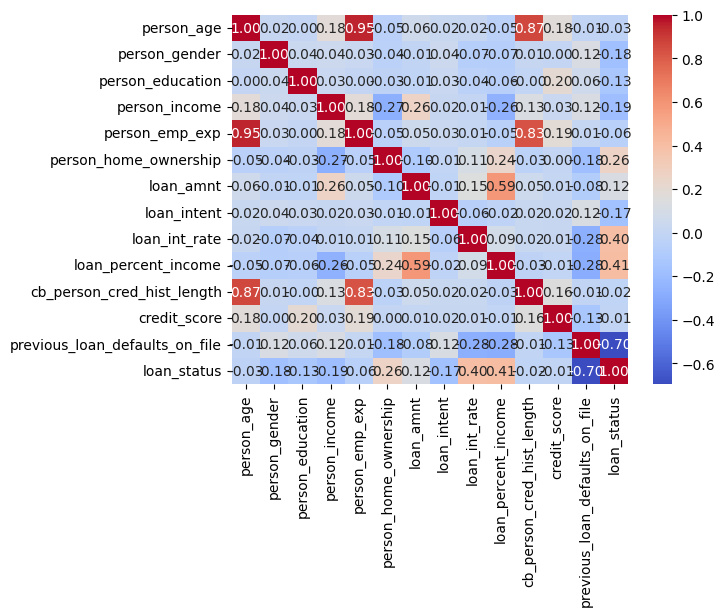

In [ ]:
corr_df=df.corr()
sns.heatmap(corr_df,cmap='coolwarm',fmt='0.2f',annot=True)

plt.show()

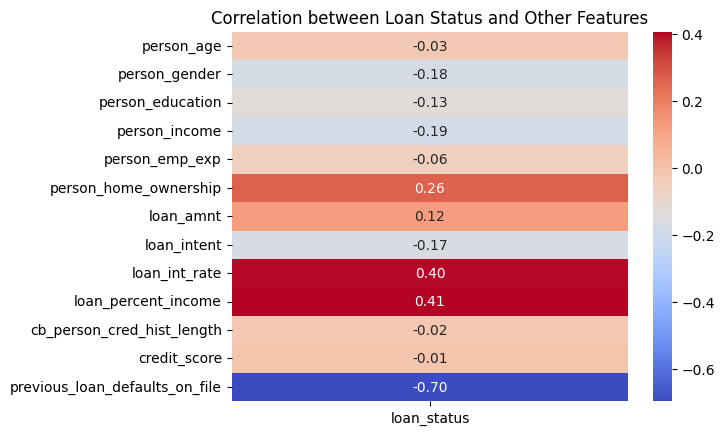

In [ ]:
loan_corr=df.corr()['loan_status']
loan_corr=loan_corr.drop('loan_status')

sns.heatmap(loan_corr.to_frame(),annot=True,fmt='0.2f',cmap='coolwarm')
plt.title('Correlation between Loan Status and Other Features')
plt.show()

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,3,71948.000000,0,3,35000.000000,4,16.020000,0.490000,3.000000,561,0,1
1,21.000000,0,0,12282.000000,0,2,1000.000000,1,11.140000,0.080000,2.000000,504,1,0
2,25.000000,0,0,12438.000000,3,0,5500.000000,3,12.870000,0.440000,3.000000,635,0,1
3,23.000000,0,2,79753.000000,0,3,35000.000000,3,15.230000,0.440000,2.000000,675,0,1
4,24.000000,1,3,66135.000000,1,3,35000.000000,3,14.270000,0.530000,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,23.093887,0,1,36708.704632,1,3,19728.875330,4,11.025770,0.539061,3.968704,657,0,1
69996,23.506316,0,1,44573.601571,0,0,4000.000000,3,14.711632,0.090000,3.246842,648,0,1
69997,27.823567,0,1,87230.938182,5,0,25000.000000,3,18.367998,0.290000,8.823567,708,0,1
69998,36.466769,0,1,54022.471364,14,3,1778.854822,3,10.543323,0.030000,14.867075,704,0,1


In [ ]:
df.drop('person_age',axis=1,inplace=True)
df.drop('person_gender',axis=1,inplace=True)
df.drop('person_education',axis=1,inplace=True)
df.drop('person_income',axis=1,inplace=True)
df.drop('person_emp_exp',axis=1,inplace=True)
df.drop('loan_amnt',axis=1,inplace=True)
df.drop('loan_intent',axis=1,inplace=True)
df.drop('cb_person_cred_hist_length',axis=1,inplace=True)
df.drop('credit_score',axis=1,inplace=True)

In [ ]:
df

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,3,16.020000,0.490000,0,1
1,2,11.140000,0.080000,1,0
2,0,12.870000,0.440000,0,1
3,3,15.230000,0.440000,0,1
4,3,14.270000,0.530000,0,1
...,...,...,...,...,...
69995,3,11.025770,0.539061,0,1
69996,0,14.711632,0.090000,0,1
69997,0,18.367998,0.290000,0,1
69998,3,10.543323,0.030000,0,1


# Skewness Detection

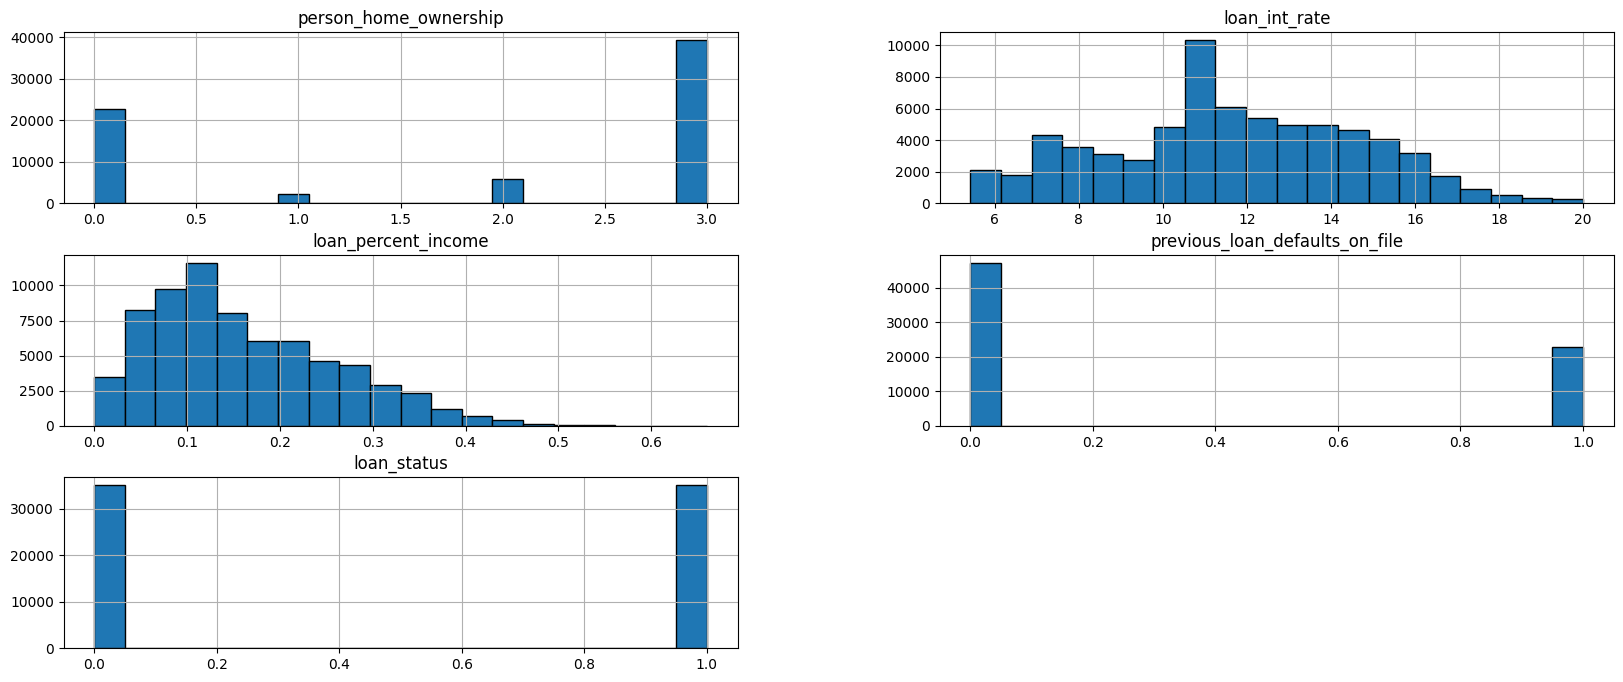

In [ ]:
df.hist(figsize=(20,8),bins=20,edgecolor='k')
plt.show()

In [ ]:
df['person_home_ownership']=np.log1p(df['person_home_ownership'])
df['loan_int_rate']=np.log1p(df['loan_int_rate'])
df['loan_percent_income']=np.log1p(df['loan_percent_income'])
df['previous_loan_defaults_on_file']=np.log1p(df['previous_loan_defaults_on_file'])

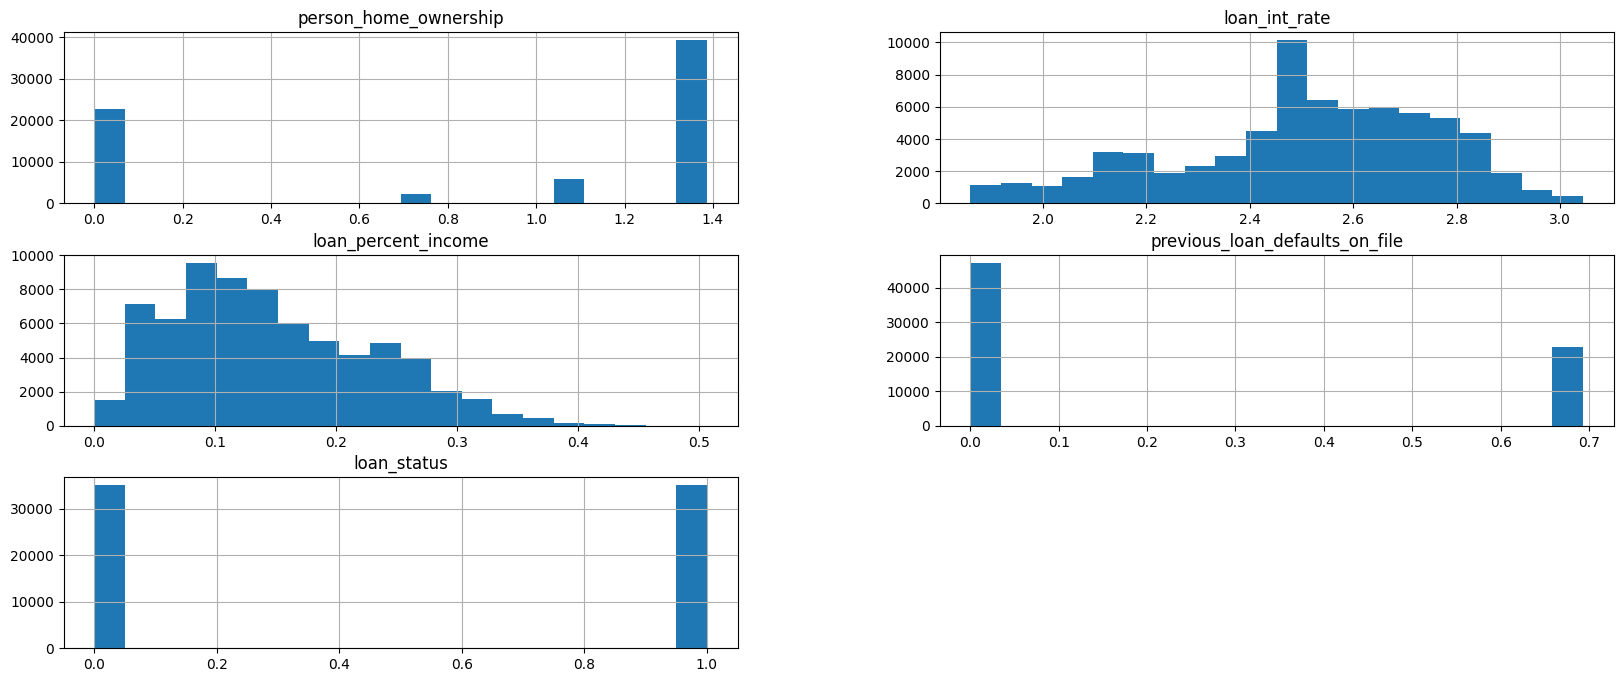

In [ ]:
df.hist(bins=20,figsize=(20,8))
plt.show()

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
1,35000
0,35000


# Outlier Detection

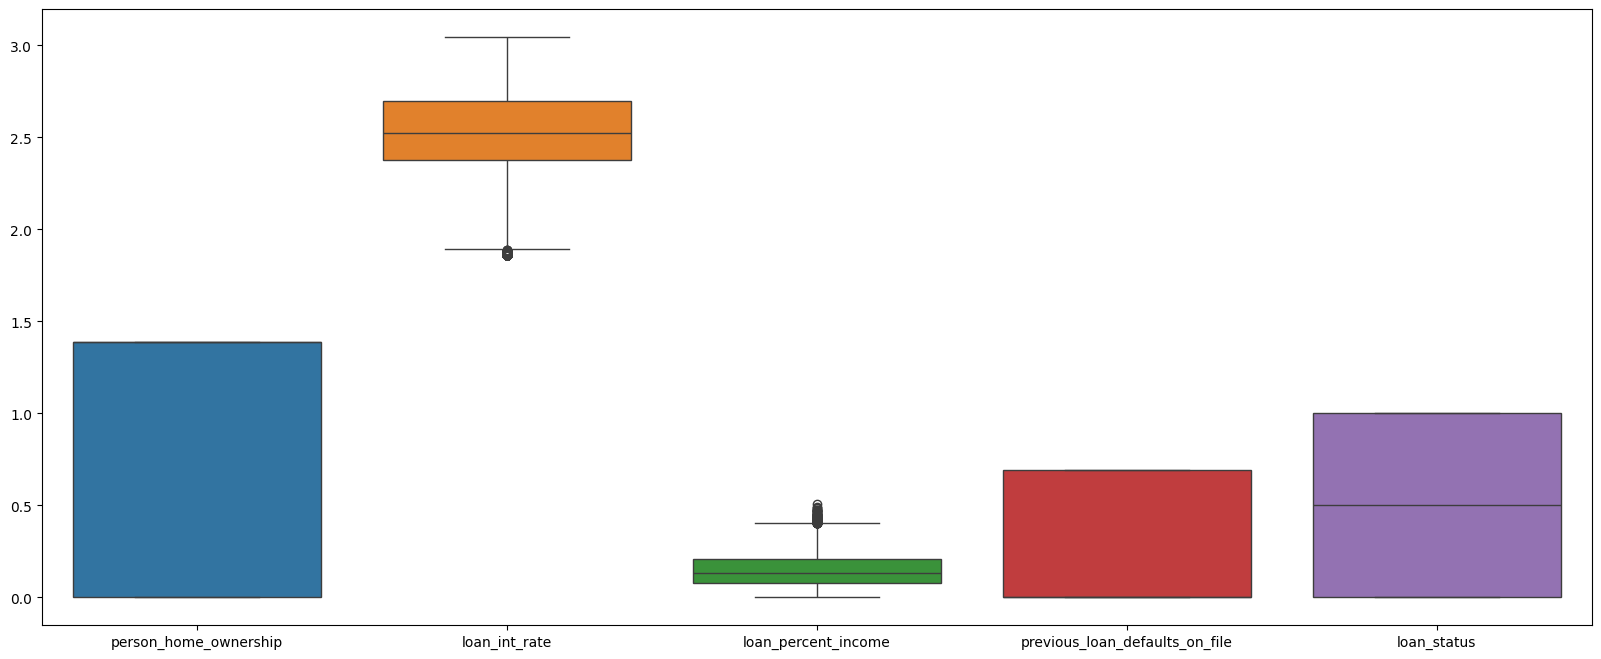

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(df)
plt.show()

In [ ]:
def remove_outlier(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned=remove_outlier(df,exclude_column='loan_status')
df_cleaned

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,1.386294,2.834389,0.398776,0.000000,1
1,1.098612,2.496506,0.076961,0.693147,0
2,0.000000,2.629728,0.364643,0.000000,1
3,1.386294,2.786861,0.364643,0.000000,1
5,1.098612,2.096790,0.173953,0.000000,1
...,...,...,...,...,...
69994,1.386294,2.504512,0.270027,0.000000,1
69996,0.000000,2.754401,0.086178,0.000000,1
69997,0.000000,2.963622,0.254642,0.000000,1
69998,1.386294,2.446107,0.029559,0.000000,1


# Data Scaling

In [ ]:
df=df_cleaned

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features=['person_home_ownership','loan_int_rate','loan_percent_income','previous_loan_defaults_on_file','loan_status']

scaler=MinMaxScaler()

scaled_df=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_df,columns=features,index=df.index)

In [ ]:
df=scaled_df
df

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,1.000000,0.817976,0.992136,0.0,1.0
1,0.792481,0.525291,0.191475,1.0,0.0
2,0.000000,0.640693,0.907215,0.0,1.0
3,1.000000,0.776806,0.907215,0.0,1.0
5,0.792481,0.179045,0.432788,0.0,1.0
...,...,...,...,...,...
69994,1.000000,0.532227,0.671815,0.0,1.0
69996,0.000000,0.748688,0.214406,0.0,1.0
69997,0.000000,0.929922,0.633538,0.0,1.0
69998,1.000000,0.481634,0.073541,0.0,1.0


# Initial Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('loan_status',axis=1)
y=df['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)

print('accuracy_score :',accuracy_score)
print('classification_report :',classification_report)

accuracy_score : 0.8636265086362651
classification_report :               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      6841
         1.0       0.83      0.93      0.87      6996

    accuracy                           0.86     13837
   macro avg       0.87      0.86      0.86     13837
weighted avg       0.87      0.86      0.86     13837

